![image](Notebook Pictures/first powerpoint slide.png)

## Debrief

**1 Environment setup**
- Explain the data

**2 Compute manually**
- Logistic regression
- Logistic regression as a neural network
- A neural network

**3 Use TensorFlow**
- TensorFlow and a deep neural network

**4 Questions and Answers**
- Thought provoking questions and their answers

*References:*
![image](Notebook Pictures/references.png)

### 1 Environment setup

**Explain the data**

We'll be using the Moons dataset found in Scikit-Learn's dataset library. This problem is complex (i.e., non-linear) yet simple (i.e., there are only two features) for learning purposes. 

Neural networks are great for non-linear data representation because at each node in a neural network two computation steps are performed--one, to compute the weighted sum given by the prior layer's output, and two, to apply a non-linear function (called an activation function). Because the function that is applied at each neuron is non-linear, neural networks are great for non-linear computation/modeling.

As shown in the first graph below, you cannot split the two moons up by using a single line (like linear models try to do). Well, you could, but predictions would not be ideal, as you will see soon.

If you want to learn a little more about the Moons dataset, start [here](http://scikit-learn.org/0.15/modules/generated/sklearn.datasets.make_moons.html).

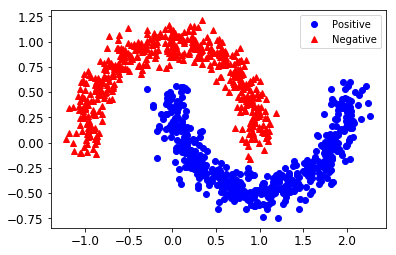

In [1]:
# Import pertinent packages
from sklearn.datasets import make_moons
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Make dataset using make_moons function provided in scikit-learn's datasets class
m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

# Setup graph size for this notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Let's take a peek at the dataset
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'bo', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend()
plt.show()

See, the two groups make these moon shapes. Can you even visualize how a straight line is supposed to separate these two groups?

Let's check out the shape of this dataset and look at the first few rows.

In [2]:
print("Shape of X_moons:", X_moons.shape)
print("Shape of y_moons:", y_moons.shape)

Shape of X_moons: (1000, 2)
Shape of y_moons: (1000,)


In [3]:
X_moons[:5]

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       [ 0.288851  , -0.44866862],
       [-0.83343911,  0.53505665]])

In [4]:
y_moons[:5]

array([1, 1, 1, 1, 0], dtype=int64)

We cannot forget to split the data into training and test sets. Let's do that now.

In [5]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons[:-test_size]
X_test = X_moons[-test_size:]
y_train = y_moons[:-test_size]
y_test = y_moons[-test_size:]

### 2 Compute manually

**Logistic regression**

This section heading may seem daunting, but you won't have to fully understand everything happening. But if you want to understand everything happening, I will detail the steps.

Let's start by using Scikit-Learn's implementation of Logistic Regression. Here we instantiate our model, as well as fit our model. We see its predictive ability. We use a function that takes the model, X, and y variables as input. We use this function to plot our logistic regression models' decision boundaries (this function is used several times in this notebook and does not need to be understood line by line).

In [7]:
import sklearn.linear_model

clf = sklearn.linear_model.LogisticRegressionCV(cv=5);
clf.fit(X_moons, y_moons);

Let's check out the accruacy of this simple logistic regression model.

In [8]:
# See its predictive ability
print("Accuracy of logistic regression using Scikit-Learn: {}%".format(clf.score(X_moons, y_moons) * 100))

Accuracy of logistic regression using Scikit-Learn: 87.7%


In [9]:
import numpy as np

# Use a function that takes the model, X, and y variables as input, which plots them as output
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min(), X[0, :].max()
    y_min, y_max = X[1, :].min(), X[1, :].max()
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

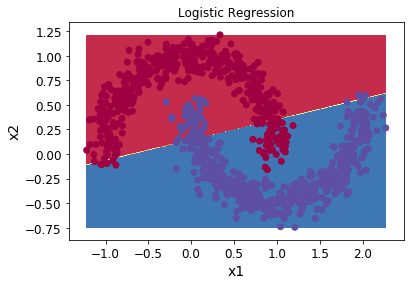

In [10]:
# Use this function to plot our logistic regression models' decision boundaries
plot_decision_boundary(lambda x: clf.predict(x), X_moons.T, y_moons.T)
plt.title("Logistic Regression")
plt.show()

Do you see how this linearly based model cannot fit this data super well. Yes, 87.7% accuracy on the data is pretty good, but we can definently do better.

**Logistic regression as a neural network**

Now that we have seen logistic regression work as a black box (i.e., we didn't have to know anything about logistic regression to make it work in the previous example), let's now look at it as a white box: let's understand what it is doing a little better. 

Knowing how logistic regression works sheds a lot of light on how neural networks work. In a sense, logistic regression can be seen as a very small neural network (not deep, by any means). 

You could skip this section if you wanted. Again, I am going to explain everything for those avid learners.

*Lesson One*

Logistic regression could be seen as a linear model that first represents the data linearly, but finally applies a non-linear function--which gives you an output between zero and one. This is almost exactly what a neural network does, but logistic regression does so on a smaller scale. 

Does the equation y = Mx + b sound familiar? It's THE linear equation everyone learns in beginning algebra. Let's define the equation a bit differently for our purposes: z = Wx + b, where W is the weight and b is the bias.

The following function takes as its only argument z. It then applies the sigmoid function to z (remember that z is the product of multiplying a weight to x--the input--then adding a bias term). 

(For your information, in neural networks these two parameters (W and b) are initialized randomly. You might even see the bias term initialized to zero, like in this notebook. Initializing the bias term b to zero is no big deal, but if you initialize the weight W to zero you will have problems. That is, your neural network schema will be useless if you initialize weights to zero.)

In [11]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    
    return s

Here is a picture of what the sigmoid function does. It basically squeezes the range of data values between zero and one. Look, the function exhibited at the top of the graph is the same as what we used in our function above.

![image](Notebook Pictures/sigmoid function.png)

*Lesson Two*

You need to understand propagation now. Propagation is the flow of calculations going forward and/or backward through the logistic regression steps. In normal/original logistic regression there is only one forward propagation step, but if we want to optimize the weights and bias terms (W and b) applied to the linear equation z = Wx + b then we can perform backward propagation, which helps to adjust W and b so that the algorithm knows which W and b combination is best. 

Think of propagation like you think of cross-validation. Cross-validation seeks through a space of possible combinations of hyperparameters which are best to model a specific dataset. Propagation seeks to do just this, but with parameters instead. 

Parameters are things like W and b. Hyperparameters are things like the learning rate, number of iterations, number of hidden layers in neural network, number of nodes in each hidden layer in a neural network, etc.

Forward propagation is easier to understand then backward propagation. Forward propagation, in logistic regression, first computes the equation z = Wx + b, then it applies the sigmoid function as described previously. 

Backward propagation computes more complicated equations (if you ever took calculus you would understand these steps; however, I will not explain the equations in this notebook) which basically adjust W and b slightly to help the algorithm find the lowest point of error. In other words, through a series of iterations, backward propagation helps the logisic regression algorithm find the best combination of W and b. 

If you are unsure about these topics at this point, below I will explain optimization which may help your understanding a bit more.

The following function takes as its arguments w, b, X, and Y. Within the function you will understand the datatypes needed to make this function work.

In [12]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (number of columns, 1)
    b -- bias, a scalar
    X -- data of size (number of columns, number of examples)
    Y -- true "label" vector (true class values) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    m = X.shape[1]
    
    # FORWARD PROPAGATION STEP (FROM X TO COST)
    Z = np.dot(w.T,X)+b                                           
    A = sigmoid(Z)                                                # compute activation
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))           # compute cost
    
    # BACKWARD PROPAGATION STEP (TO FIND GRAD)
    dz = A-Y
    dw = 1/m*np.dot(X,dz.T)
    db = 1/m*np.sum(dz) 

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

You may have recognized the line that starts with "cost = " (the 21st line in the block above). I haven't yet discussed this concept, so let's do that now. 

To understand this line of code, know that after the algorithm computes forward propagation, and before it computes backward propagation, it must compute a cost function. The weights and bias terms determine the value of the cost function. Thus our algorithm is trying to find the optimal values of the weights and bias terms to compute the lowest cost function possible.

Quick note: The np.dot() function is a way to perform vectorization. Vectorization in this context is the way to perform the same computations to every row in your dataset.

*Lesson Three*

The following function will be easier to understand now that we have discussed the cost function a little. We have also discussed optimizing. Remember, our ultimate goal and what we code our algorithm to do is to optimize a cost function. In logistic regression (i.e., in binary classification) we optimize the weight and bias terms to reduce (i.e., optimize) the cost function.

In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (number of columns, 1)
    b -- bias, a scalar
    X -- data of size (number of columns, number of examples)
    Y -- true "label" vector (true class values) of size (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    1) Calculate the cost and the gradient for the current parameters. Use propagate().
    2) Update the parameters using gradient descent rule for w and b.
    """
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Update rule
        w = w-(learning_rate*dw)
        b = b-(learning_rate*db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

This next function is simply used to label a zero or one for each row of data based on the probability computed by the logistic regression algorithm. For those who are curious, this does work for multi-class classificiation too.

In [14]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (number of columns, 1)
    b -- bias, a scalar
    X -- data of size (number of columns, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction = np.where(A<=0.5,0,1)
        pass
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

Now, let's throw the previous functions into one easy-to-use machine learning logistic regression algorithm/model.

In [15]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of columns, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (number of columns, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """    
    # Initialize parameters with zeros
    w, b = np.zeros((X_train.shape[0], 1)), 0

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Ok, we are done explaining all the functions needed to compute and use a logistic regression model with a neural network mindset. 

Let's move to hyperparameter tuning. This was discussed previously. The algorithm we built above allows for two hyperparameters: num_iterations and learning_rate. 

The number of iterations tells the algorithm how many times to go forward and backward through the propagation steps. How do you know what number is best? Well, you don't know until you try some options and compare how well they do in relation to the other options.

The learning rate is basically a hyperparameter that makes the algorithm go faster or slower through finding the lowest cost function (check out the GIFs below this chunk of code). (There is an equation that uses the learning rate which I won't explain here.) However, I will warn you of going too fast or too slow (i.e., using a learning rate that is too large or too small); hence, tuning it as a hyperparameter.

![gif](PowerPoint Pictures/sgd.gif)

![gif](PowerPoint Pictures/sgd_bad.gif)

So, let's use two for-loops to find the best combination of these two hyperparameters. (Note: using cross-validation with grid search would be optimal, but I won't apply them here.)

In [16]:
iters = [10000, 50000]
rates = [0.05, 0.01, 0.005, 0.001]
for i in iters:
    for r in rates:
        print("Tuning hyperparameters num_iterations = {} and learning_rate = {}".format(i, r))
        model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = i, learning_rate = r, print_cost = False)

Tuning hyperparameters num_iterations = 10000 and learning_rate = 0.05
train accuracy: 88.25 %
test accuracy: 88.0 %
Tuning hyperparameters num_iterations = 10000 and learning_rate = 0.01
train accuracy: 87.625 %
test accuracy: 86.0 %
Tuning hyperparameters num_iterations = 10000 and learning_rate = 0.005
train accuracy: 86.5 %
test accuracy: 85.5 %
Tuning hyperparameters num_iterations = 10000 and learning_rate = 0.001
train accuracy: 83.25 %
test accuracy: 81.0 %
Tuning hyperparameters num_iterations = 50000 and learning_rate = 0.05
train accuracy: 88.125 %
test accuracy: 87.5 %
Tuning hyperparameters num_iterations = 50000 and learning_rate = 0.01
train accuracy: 88.25 %
test accuracy: 88.0 %
Tuning hyperparameters num_iterations = 50000 and learning_rate = 0.005
train accuracy: 87.625 %
test accuracy: 86.5 %
Tuning hyperparameters num_iterations = 50000 and learning_rate = 0.001
train accuracy: 86.5 %
test accuracy: 85.5 %


Let's check out the accruacy of this logistic regression model with the best parameters we found from above.

In [17]:
d = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = 10000, learning_rate = 0.05, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.280359
Cost after iteration 2000: 0.258320
Cost after iteration 3000: 0.251377
Cost after iteration 4000: 0.248555
Cost after iteration 5000: 0.247246
Cost after iteration 6000: 0.246591
Cost after iteration 7000: 0.246246
Cost after iteration 8000: 0.246058
Cost after iteration 9000: 0.245954
train accuracy: 88.25 %
test accuracy: 88.0 %


And let's use our decision boundary function above to see how well our algorithm did.

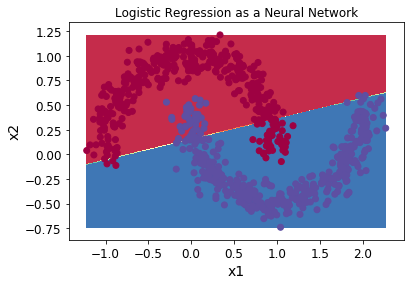

In [18]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(d['w'], d['b'], x.T), X_train.T, y_train.T)
plt.title("Logistic Regression as a Neural Network")
plt.show()

This looks the same as Scikit-Learn's logistic regression implementation, but it actually does a little better. ;-)

Let's see the worst hyperparameters we found in our hyperparameter tuning from above.

train accuracy: 86.5 %
test accuracy: 85.5 %


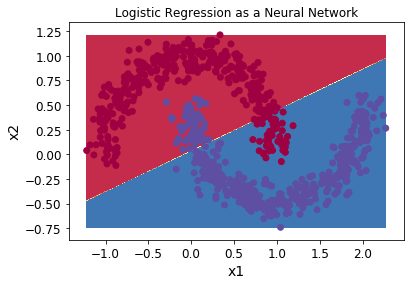

In [19]:
d = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = 10000, learning_rate = 0.005, print_cost = False)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(d['w'], d['b'], x.T), X_train.T, y_train.T)
plt.title("Logistic Regression as a Neural Network")
plt.show()

Worse! Yep, our tuning of the hyperparameters helped.

Notice still that a line is NOT the best way to separate these two moons. Out of curiosity, earlier I asked where you would put a line to separate these two moons, where did you put yours related to these graphs? 

Can a neural network do better? Yes! Let's see.

**A neural network**
- With one hidden layer

*Goal of a neural network with gradient descent:* Minimize the cost function by adjusting the weight and bias terms.

Jumping from learning about logistic regression to learning about neural networks may seem daunting, but the way I just described a logistic regression model will help in understanding neural networks significantly. So if you understood everything up to this point you are ahead of the game. If you struggled through the prior information, you may struggle more with neural networks. However, again, you don't have to understand this stuff perfectly to implement it.

Don't get discouraged, this stuff IS difficult content.

A neural network is basically going to add more points (nodes) where the algorithm is calculating z = Wx + b and how many times an activiation function is applied to z.

So, if we have a neural network with one hidden layer and four neurons within that hidden layer then z = Wx + b will be computed four times. How many times with the activation function be applied? Four times as well. To clarify, at each neuron--no matter how many neurons there are--two computations with be made: z will be calculated (i.e., z = Wx + b) and an activation function will be applied to z.

You might be asking yourself that if the same computation is being made at each node, how is that useful? Wouldn't each node literally output the same value for z? The answer is, yes, *if* W and b are initialized to the same value then each node *would* output the same value for z. And this *would* be useless. But, there is more to discuss on this topic, and we will address this concern soon.

Below, we start to construct functions which will be used in a neural network model function.

The first function stores the size of the input X and the input Y. One of the biggest issues with applying a neural network has to deal with the size and shape of data passed through a neural network. Basically, I am saying it is difficult to keep track of the size and shape of the data. Well, this first function helps handle that just a bit.

In [20]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_y)

Earlier you read this block of text:

"(For your information, in neural networks these two parameters (W and b) are initialized randomly. You might even see the bias term initialized to zero, like in this notebook. Initializing the bias term b to zero is no big deal, but if you initialize the weight W to zero you will have problems. That is, your neural network schema will be useless if you initialize weights to zero.)"

And you also read this block of text:

"You might be asking yourself that if the same computation is being made at each node, how is that useful? Wouldn't each node literally output the same value for z? The answer is, yes, if W and b are initialized to the same value then each node would output the same value for z. And this would be useless. But, there is more to discuss on this topic, and we will address this concern soon."

Let's discuss this topic now. 

Simply put, if we initialized W and b to be the very same value (say zero or one) then each node would output the same result every time, and this would be useless for a neural network trying to find the best parameters (W and b) to minimize the cost function. But, the fact is, we don't initialize W and b to be the same thing. (Well, we can initialize b to be the same value, but never for W.) And since we don't initailize W to be the same value, each node does output a different value. Which *is* useful.

Here's a question for you: What are the negative consequences of initializing all W's and b's to the same values? And what gain is there from initializing them to different values? If you asked me that, I would say that is an amazing question. If all W's and b's were initialized to the same value then there would be no point to having more than one neuron at each layer.

Ok, have we beat that topic over the head? Shall we continue? Let's do.

Below, we have a function that is used to initialize your W and b parameters. You will see that all W's are initialized randomly and multiplied by 0.01, while all b's are initialized to zero. Notice also that one of the parameters is n_h which is the size of the hidden layer (i.e., the number of neurons in the hidden layer). The other two parameters, n_x and n_y, are passed in from the previous function.

In [21]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

You should be somewhat familiar with this next function: forward_propagation. It simply computes our equations going forward at each neuron. Notice the activation functions applied: tanh and sigmoid. It takes in as parameters X and the parameters dictionary spit out from the function above.

In [22]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1)+b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Remember, there is a forward propagation step and a backward propagation step. Also, between both forward and backward propagation steps a cost function is computed. Remember, we are trying to minimize a cost function. 

The cost function is a measure of how far off our predictions are from the truth. We want to minimize this cost function. We are training our algorithm to change W and b in the best ways to minimize the cost function as much as possible. And we iterate through these steps to find what parameter (W and b) values are needed for a minimized cost function.

The below function computes the cost.

In [23]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

We now propagate backwards.

(For your information: backward propagation calculations include derivatives and calculus. I do not discuss backward propagation in detail in this notebook.)

In [24]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2-Y
    dW2 = 1/m*np.dot(dZ2, A1.T)
    db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T*dZ2*(1 - np.power(A1, 2))
    dW1 = 1/m*np.dot(dZ1, X.T)
    db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

Now that forward propagation has been computed, the cost function has been computed, and backward propagation has been computed, we need to update the parameters W and b to get ready for the next iteration through this cycle.

We've talked about learning rate before. Reread that section on learning rate (look just above the GIfs earlier on in this notebook) if you need a refresher to understand the function below.

In [25]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Well, that was a lot of information. But, of a truth, that would have been much more difficult to understand had I not described most of these topics using a logisitic regression model before discussing these topics using a neural network.

Now, let's apply the previous functions into a full-functioning neural network machine learning model. Let's also build in the ability for the number of iterations and the number of hidden layers.

In [26]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x, n_y = layer_sizes(X, Y)
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

We need this next predict function to be able to make predictions after training our algorithm. We only need to pass it our final parameters after training and the data we want it to make predictions on (X).

In [27]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

Now, let's use this bad boy.

In [28]:
d = nn_model(X_train.T, y_train.reshape((1, y_train.shape[0])), n_h = 4, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.692991
Cost after iteration 1000: 0.244007
Cost after iteration 2000: 0.006081
Cost after iteration 3000: 0.003438
Cost after iteration 4000: 0.002504
Cost after iteration 5000: 0.002006
Cost after iteration 6000: 0.001688
Cost after iteration 7000: 0.001465
Cost after iteration 8000: 0.001298
Cost after iteration 9000: 0.001167


Wow, the cost function from our earlier logistic regression model only got down to 24.5%, now we are at 0.1%. Neural network magic.

Let's check out model accuracy.

In [29]:
from sklearn.metrics import accuracy_score

print('Training set accuracy:', accuracy_score(y_train.reshape((1, y_train.shape[0])), predict(d, X_train.T)) * 100)
print('Testing set accuracy:', 100 - np.mean(np.abs(predict(d, X_test.T) - y_test.reshape((1, y_test.shape[0])))) * 100)

Training set accuracy: 100.0
Testing set accuracy: 99.0


100% on training dataset and 99% on testing dataset. Impossible? No. Neural network magic.

Let's check out where the decision boundaries are for our neural network.

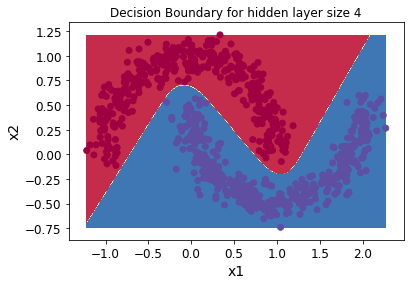

In [30]:
parameters = nn_model(X_train.T, y_train.reshape((1, y_train.shape[0])), n_h = 4, num_iterations = 10000, print_cost=False)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X_train.T, y_train.reshape((1, y_train.shape[0])))
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show()

Crazy, right? Well that was for the training dataset, now let's look at the decision boundaries for the testing dataset.

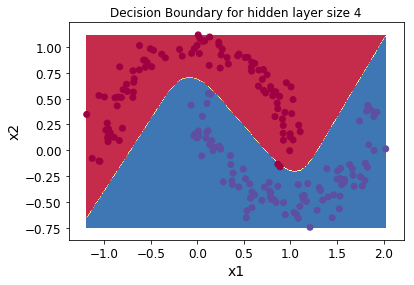

In [31]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X_test.T, y_test.reshape((1, y_test.shape[0])))
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show()

Yep, you can see there were only two misclassified (at least, it looks like just two).

Now that we discussed many topics of neural networks and it took us a little while to do so, let's make the process easier by using TensorFlow. And let's make a deep neural network (i.e., a neural network with more than just one hidden layer).

### 3 Use TensorFlow
- TensorFlow and a deep neural network

So, I am going to start this section off with a version of logistic regression before jumping into a deep neural network. Also, we will see the difference between the sigmoid activation function and the ReLU activation function. We haven't talked much about activation functions yet, but we will.

One thing that is nice about using TensorFlow is you don't have to worry about backward propagation. If you set up forward propagation correctly, backward propagation is built in. Thank you Google!

Let's first organize our data. 

First, we add a bias term to our input layer as shown in the below diagram of a fully connected deep neural network architecture.

![image](PowerPoint Pictures/Multi-Layer Perceptron.png)

In [32]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]
y_moons_column_vector = y_moons.reshape(-1, 1)

Let's see what the data looks like.

In [33]:
X_moons_with_bias

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       ...,
       [ 1.        ,  1.68425911, -0.34822268],
       [ 1.        , -0.9672013 ,  0.26367208],
       [ 1.        ,  0.78758971,  0.61660945]])

In [34]:
y_moons_column_vector[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

We cannot forget to split the data into train and test sets.

In [35]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

With TensorFlow, there are two main parts we need to consider in the flow of our code. First, is the computation graph: we need to structure the flow of the neural network, or logistic regression model in our current case (this is called the construction phase). Second, we need to pass the data through the structure (this is called the execution phase).

The reset_graph function below resets the TensorFlow graph if there is another in use. The random_batch function below fetches a portion of our data to feed through the model.

In [36]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

I am going to comment within the code for these chunks.

In [37]:
import tensorflow as tf

reset_graph()

# Here we state some information and hyperparameters for the algorithm to use:
# number of inputs, learning rate, number of propagation iterations, size of
# the batch at each epoch, and number of batches in total
n_inputs = 2
learning_rate = 0.01
n_epochs = 10000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

###### Construction Phase #######
# Here we have a placeholder for our X and y data sources
X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X") # n_inputs + 1 because of the bias term
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

# Here we build the logistic regression model 
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = tf.sigmoid(logits) # y_proba = 1 / (1 + tf.exp(-logits))

# Here is the cost function we will use: log_loss
loss = tf.losses.log_loss(y, y_proba)  # uses epsilon = 1e-7 by default

# Here we state which optimizer we want to use
# We then tell it to minimize the cost function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

# Here we build the variable initializer
init = tf.global_variables_initializer()

I want to point out two things here:
1. There are many deep learning topics that I will not be able to cover in this notebook.
2. One topic I will not cover is the optimizer

We have been using gradient descent to optimize our cost function in this notebook, but there are many other kinds of optimizers. Some are better than gradient descent, like the momentum optimizer.

Now, for the execution phase, we just start the session, loop through the number of propagation iterations we want, and feed our data through the neural network structure built previously. Then we print how well the algorithm is minimizing the cost function.

In [38]:
###### Execution Phase #######
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_test = loss.eval({X: X_test, y: y_test})
        if epoch % 1000 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_test)

    y_proba_test = y_proba.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Loss: 0.79260236
Epoch: 1000 	Loss: 0.2745512
Epoch: 2000 	Loss: 0.27340233
Epoch: 3000 	Loss: 0.27402964
Epoch: 4000 	Loss: 0.2745066
Epoch: 5000 	Loss: 0.2746772
Epoch: 6000 	Loss: 0.27525103
Epoch: 7000 	Loss: 0.27471477
Epoch: 8000 	Loss: 0.27453774
Epoch: 9000 	Loss: 0.2741684


Now, let's view how well the logistic regression algorithm predicts.

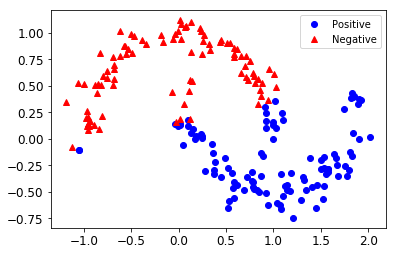

In [39]:
y_pred = (y_proba_test >= 0.5)
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'bo', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

Now, let's do the very same thing with a deep neural network. 

This one will use the sigmoid function as the activation function in the hidden layers. After this we will use the ReLU activation function and see it perform better.

In [40]:
import tensorflow as tf

reset_graph()

# Same as before
n_inputs = 3
learning_rate = 0.01
n_epochs = 10000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

# Here we state that the number of neurons we want at the first hidden
# layer will be four, and 3 at the second. We also state that there 
# are two possible classes as output
n_hidden1 = 5
n_hidden2 = 3
n_outputs = 2

###### Construction Phase #######
# Same as before
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

# You can basically guess what is going on here. Notice the activation parameter
hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.sigmoid)
hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.sigmoid)
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

# Here we build the cost function
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

# Same as before
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Here we build a structure to evaluate the accuracy of the model
# We will use this code to spit out how well the algorithm is 
# doing based on accuracy, but our algorithm will still be 
# minimizing the cost function as built in the above block of code
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Same as before
init = tf.global_variables_initializer()

###### Execution Phase #######
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch.ravel()})
        if epoch % 1000 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch.ravel()})
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test.ravel()})
            print(epoch, "Train accuracy:", acc_train, "\tTest accuracy:", acc_test)

    Z = logits.eval(feed_dict={X: X_test, y: y_test.ravel()})
    y_proba_test = np.argmax(Z, axis=1)

0 Train accuracy: 0.62 	Test accuracy: 0.495
1000 Train accuracy: 0.88 	Test accuracy: 0.88
2000 Train accuracy: 0.78 	Test accuracy: 0.88
3000 Train accuracy: 0.94 	Test accuracy: 0.875
4000 Train accuracy: 0.92 	Test accuracy: 0.885
5000 Train accuracy: 0.88 	Test accuracy: 0.885
6000 Train accuracy: 0.9 	Test accuracy: 0.885
7000 Train accuracy: 0.86 	Test accuracy: 0.88
8000 Train accuracy: 0.92 	Test accuracy: 0.875
9000 Train accuracy: 0.9 	Test accuracy: 0.88


Interestingly, this didn't do so hot. Not much better than logistic regression. With some parameter tuning you would find that 4 instead of 5 neurons at the first hidden layer does well. But, we will see soon how keeping all things similar but changing the activation function helps improve accuracy considerably. (Notice, I just told you how hyperparameter tuning can also make the network perform better. Try it out for yourself.)

Let's view how well this one did.

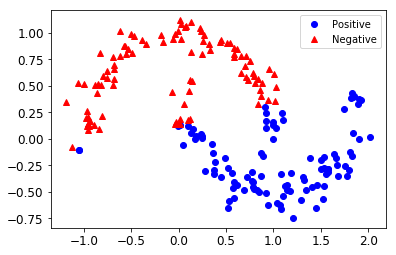

In [41]:
y_pred = (y_proba_test >= 0.5)
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'bo', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

For the last topic of this notebook I will discuss activation functions. Here is a table to show many activation functions.

![image](PowerPoint Pictures/activation functions.png)

Remember that there are two computations made at each neuron in a neural network: z = Wx + b and then an activation function is applied to z. Well, we can apply any activation function we would like. Some work better than others, however. For instance, the ReLU function tends to perform better at hidden layers than the sigmoid (logic) function does. We will see this in a moment. 

ReLU function stand for 'Re'ctified 'L'inear 'U'nit. The ReLU function is faster to compute than the sigmoid function and therefore helps the algorithm computations as a whole perform faster. We won't talk about the others in this notebook. Just know that there are others and some do better than others. The rule of thumb is ReLU is a great start. It is a hyperparameter that you could tune.

Now, let's see the ReLU perform better than the sigmoid function.

In [42]:
import tensorflow as tf

reset_graph()

n_inputs = 3
learning_rate = 0.01
n_epochs = 10000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))
n_hidden1 = 5
n_hidden2 = 3
n_outputs = 2

###### Construction Phase #######
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

###### Execution Phase #######
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch.ravel()})
        if epoch % 1000 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch.ravel()})
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test.ravel()})
            print(epoch, "Train accuracy:", acc_train, "\tTest accuracy:", acc_test)

    Z = logits.eval(feed_dict={X: X_test, y: y_test.ravel()})
    y_proba_test = np.argmax(Z, axis=1)

0 Train accuracy: 0.4 	Test accuracy: 0.295
1000 Train accuracy: 1.0 	Test accuracy: 0.99
2000 Train accuracy: 1.0 	Test accuracy: 0.99
3000 Train accuracy: 1.0 	Test accuracy: 0.99
4000 Train accuracy: 1.0 	Test accuracy: 0.99
5000 Train accuracy: 1.0 	Test accuracy: 1.0
6000 Train accuracy: 1.0 	Test accuracy: 0.99
7000 Train accuracy: 1.0 	Test accuracy: 0.99
8000 Train accuracy: 1.0 	Test accuracy: 0.99
9000 Train accuracy: 1.0 	Test accuracy: 0.99


Do you see how much faster it got to almost perfect accuracy? And the only change we made was the activation function used at the hidden layers. Way cool!

Let's view the graph.

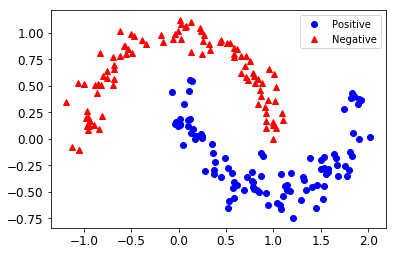

In [43]:
y_pred = (y_proba_test >= 0.5)
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'bo', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

All done. You made it to the end. Congrats!

Below you will find some interesting questions and answers to consider and remember going forward with neural networks and TensorFlow. 

### 4 Questions and Answers
- Thought provoking questions and their answers

1Q: Is a neural network with one hidden layer considered a deep neural network?

1A: No, a neural network needs to have at least 2 hidden layers to be considered deep.

2Q: How many neurons do you need in the output layer if you want to classify a binary response? What activiation function should you use in the output layer? If instead, you want to tackle the classification task with more than two response categories, how many neurons do you need in the output layer, using what activiation function?

2A: You just need one neuron in the output layer of the neural network--for example, indicating the probablity of each instance to be in the positive class. You would typically use the logistic activiation function in the output layer when estimating probabilities. You would use a softmax function for multiclass output.

3Q: What is backpropagation and how does it work?

3A: Backpropagation is a technique used to train artificial nueral networks. It first computes the gradients of the cost function with regards to every model parameter (all the weights and biases), and then it performs a GD step using these gradients. Backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a GD step.

4Q: What are parameters and hyperparameters? Which does backpropagation tweak and which do you tweak? Can you name them all?

4A: Parameters are things like W and b: backprogagation tweaks these. Hyperparameters are things like the learning rate, number of iterations, number of hidden layers in neural network, number of nodes in each hidden layer in a neural network, etc.: you tweak these.

5Q: In general, which activation functions should be used for hidden layers and for output layers?

5A: For hidden layers, the ReLU tends to be the go to. It is fast to compute and commonly used. Note that in this notebook we used a sigmoid (logic) function for all layers. For output layers, if the class problem is binary (zero and one) then a sigmoid (logit) function is used. For multi-class classification, as softmax function is used.

6Q: What unique feature of a neural network is lost when all W parameters are initialized to the same value?

6A: Having more than one neuron.

7Q: Can TensorFlow be used for more algorithms than just neural networks?

7A: Yes, in this notebook we say TensorFlow used for a logistic regression model and for a neural network.